In [1]:
# Imports
from pathlib import Path
import torch
import matplotlib.pyplot as plt

In [2]:
# Import own helpers
from vesuvius.training.train import make_dataloaders
from vesuvius.data.vesuvius_train import VesuviusTrainDataset

In [3]:
# Root folder path
ROOT = Path("~/vesuvius-scroll-detection/data/raw/vesuvius").expanduser()

print("ROOT:", ROOT)

ROOT: /Users/chamu/vesuvius-scroll-detection/data/raw/vesuvius


In [ ]:
# Dataset-level sanity check
ds = VesuviusTrainDataset(ROOT)

print("Dataset size:", len(ds))

img, mask, sid = ds[0] # From the ones that are not missing

print("sid:", sid)

# 1: #channels (=1 for greyscale), D: depth, H: heigth, W: width
print("img shape:", img.shape, "dtype:", img.dtype) # 3D -> [1, D, H, W]
print("mask shape:", mask.shape, "dtype:", mask.dtype) # 3D -> [1, D, H, W]

Dataset size: 806
sid: 2290837
img shape: torch.Size([1, 320, 320, 320]) dtype: torch.float32
mask shape: torch.Size([1, 320, 320, 320]) dtype: torch.float32


(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

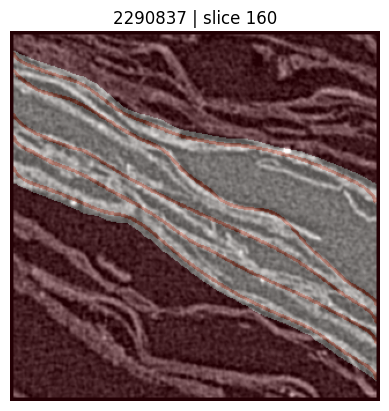

In [5]:
# Visual sanity check
z = img.shape[1] // 2   # middle slice
plt.imshow(img[0, z], cmap="gray")
plt.imshow(mask[0, z], alpha=0.35, cmap="Reds")
plt.title(f"{sid} | slice {z}")
plt.axis("off")

In [6]:
# Test make_dataloaders
train_loader, val_loader, train_ds, val_ds = make_dataloaders(
    data_root=ROOT,
    batch_size=2,
    val_fraction=0.15,
    seed=0
)

In [7]:
batch = next(iter(train_loader))
imgs, masks, sids = batch

print("imgs:", imgs.shape, imgs.dtype)
print("masks:", masks.shape, masks.dtype)
print("sids:", sids)

/Users/chamu/vesuvius-scroll-detection/.venv/lib/python3.14/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


imgs: torch.Size([2, 1, 320, 320, 320]) torch.float32
masks: torch.Size([2, 1, 320, 320, 320]) torch.float32
sids: ('2736169384', '105796630')


(np.float64(-0.5), np.float64(319.5), np.float64(319.5), np.float64(-0.5))

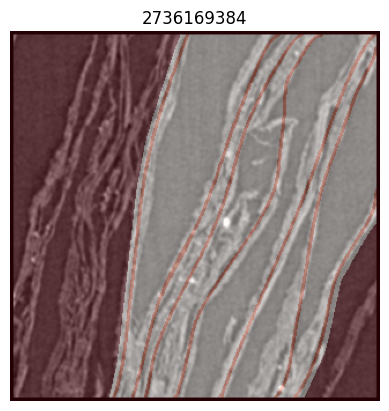

In [8]:
# Visualise a batch element
i = 0
img = imgs[i]
mask = masks[i]

if img.ndim == 3:  # (1, H, W)
    plt.imshow(img[0], cmap="gray")
    plt.imshow(mask[0], alpha=0.35, cmap="Reds")
else:              # (1, D, H, W)
    z = img.shape[1] // 2
    plt.imshow(img[0, z], cmap="gray")
    plt.imshow(mask[0, z], alpha=0.35, cmap="Reds")

plt.title(sids[i])
plt.axis("off")